<a href="https://colab.research.google.com/github/thamyrys-bl/example-geobr/blob/main/Reclassificacao_de_dados_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Reclassificação de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
dados=gpd.read_file('/content/TravelTimes_to_5975375_RailwayStation.shp')

In [ ]:
dados.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [ ]:
dados=dados[dados['pt_r_tt']>=0]

In [ ]:
!pip install mapclassify==2.4.3 -q

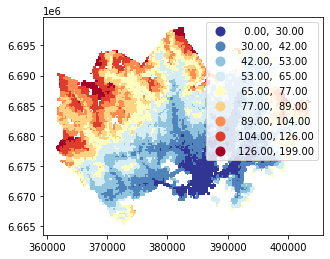

In [ ]:
import matplotlib.pyplot as plt
dados.plot(column='pt_r_tt', scheme='Fisher_Jenks', k=9, cmap='RdYlBu_r', linewidth=0, legend=True)

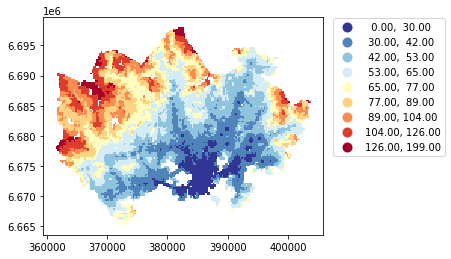

In [ ]:
dados.plot(column='pt_r_tt', scheme='Fisher_Jenks', k=9, cmap='RdYlBu_r', linewidth=0, legend=True, legend_kwds={'bbox_to_anchor':(1.15,0.82,0.3,0.2)})

In [ ]:
dados=dados[dados['walk_d']>=0]

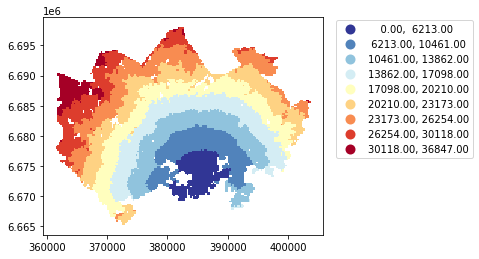

In [ ]:
dados.plot(column='walk_d', scheme='Fisher_Jenks', k=9, cmap='RdYlBu_r', linewidth=0, legend=True, legend_kwds={'bbox_to_anchor':(1.55,1.01)})

In [ ]:
!pip install pysal -q

     |████████████████████████████████| 5.7 MB 8.1 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 243 kB 52.9 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 2.4 MB 53.3 MB/s 
     |████████████████████████████████| 209 kB 49.8 MB/s 
     |████████████████████████████████| 116 kB 51.2 MB/s 
     |████████████████████████████████| 147 kB 46.2 MB/s 
     |████████████████████████████████| 41 kB 640 kB/s 
     |████████████████████████████████| 60 kB 6.4 MB/s 
     |████████████████████████████████| 46 kB 3.5 MB/s 
     |████████████████████████████████| 179 kB 40.0 MB/s 
     |████████████████████████████████| 2.1 MB 32.2 MB/s 
     |████████████████████████████████| 78 kB 6.4 MB/s 
     |████████████████████████████████| 183 kB 52.3 MB/s 
     |████████████████████████████████| 1.0 MB 36.6 MB/s 
     |████████████████████████████████| 14.2 MB 43.0 MB/s 
     |████████████████████

In [ ]:
import pysal as ps
import mapclassify as mpc

In [ ]:
#Verificar a possibilidade de usar seed
import numpy as np
np.random.seed(123456)
classificador=mpc.NaturalBreaks(dados['pt_r_tt'], k=9)
classificador

NaturalBreaks           

    Interval       Count
------------------------
[  0.00,  28.00] |   650
( 28.00,  41.00] |  2024
( 41.00,  52.00] |  2576
( 52.00,  64.00] |  2324
( 64.00,  77.00] |  1820
( 77.00,  90.00] |  1590
( 90.00, 104.00] |  1001
(104.00, 126.00] |   786
(126.00, 199.00] |   222

In [ ]:
classificacao=dados[['pt_r_tt']].apply(classificador)
classificacao.head()

,pt_r_tt
0,8
1,8
2,8
3,8
4,7


In [ ]:
classificacao.columns=['nb_pt_r_tt']
classificacao.head()

,nb_pt_r_tt
0,8
1,8
2,8
3,8
4,7


In [ ]:
dados=dados.join(classificacao)
dados.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry,nb_pt_r_tt
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6...",8
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6...",8
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6...",8
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.000 6697750.000, 382500.000 6...",8
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.000 6697500.000, 381000.000 6...",7


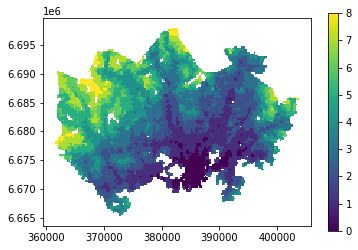

In [ ]:
dados.plot(column="nb_pt_r_tt", linewidth=0,legend=True)